# Esercizi sulla FFT

In [2]:
# Librerie
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io
import scipy.ndimage as ndi
plt.rcParams['figure.figsize'] = [10, 5]

<Figure size 1000x500 with 0 Axes>

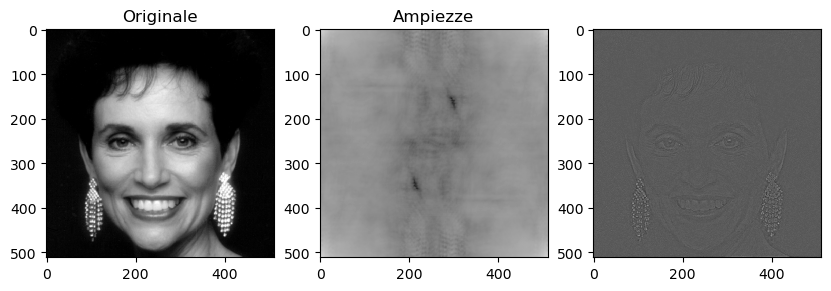

<Figure size 1000x500 with 0 Axes>

In [3]:
x = io.imread("volto.tif")
x = np.float32(x)

# Calcolo della DFT
X = np.fft.fft2(x)

Amp = np.abs(X)
Fas = np.exp(1j*np.angle(X))

x_amp = np.fft.ifft2(Amp)
x_fas = np.fft.ifft2(Fas)

x_amp = np.real(x_amp)
x_fas = np.real(x_fas)

# Enhancement dell'ampiezza
x_amp = np.log(x_amp-np.min(x_amp)+1)

plt.figure()
plt.subplot(1,3,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")

plt.subplot(1,3,2)
plt.imshow(x_amp, clim=None, cmap="gray")
plt.title("Ampiezze")

plt.subplot(1,3,3)
plt.imshow(x_fas, clim=None, cmap="gray")
plt.figure("Fasi")

Text(0.5, 1.0, 'A. Rettangolo, F.Faccia')

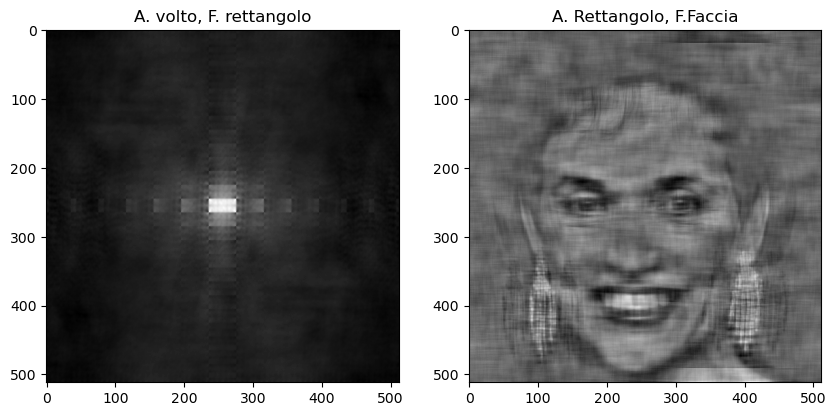

In [6]:
# Considerazioni sulla sostituzione delle varie parti con il quadrato
x = io.imread("volto.tif")
x = np.float32(x)

y = io.imread("rettangolo.jpg")
y = np.float32(y)

X = np.fft.fftshift(np.fft.fft2(x))
Y = np.fft.fftshift(np.fft.fft2(y))

# Divido ampiezza e fase
X_amp = np.abs(X)
X_fase = np.exp(1j*np.angle(X))

# Divido fase ed ampiezza di rettangolo.jpg
Y_amp = np.abs(Y)
Y_fase = np.exp(1j*np.angle(Y))

# Ampiezza Volto, fase rettangolo
Volto_rett = X_amp * Y_fase

# Ampiezza rettangolo Fase Volto
Rett_volto = Y_amp * X_fase

# Vado ad effettuare la trasformazione nel dominio del tempo ottenendo
VT_temp = np.real(np.fft.ifft2(np.fft.ifftshift(Volto_rett)))
TV_temp = np.real(np.fft.ifft2(np.fft.ifftshift(Rett_volto)))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(VT_temp, clim=None, cmap="gray")
plt.title("A. volto, F. rettangolo")
plt.subplot(1,2,2)
plt.imshow(TV_temp, clim=None, cmap="gray")
plt.title("A. Rettangolo, F.Faccia")


### Risposta in frequenza del filtro media aritmetica

In [9]:
def media_aritmetica_fft(x, k):
    # Genero il filtro media aritmetica
    h = np.ones((k,k))/k**2

    # Definisco le dimensioni della trasformata (convoluzione)
    M,N = x.shape
    P = M + k - 1
    Q = N + k - 1

    # Vado a considerare la trasformata di fourier
    X = np.fft.fft2(x, (P,Q))
    H = np.fft.fft2(h, (P,Q))

    Y = X * H

    y = np.real(np.fft.ifft2(Y))

    return y

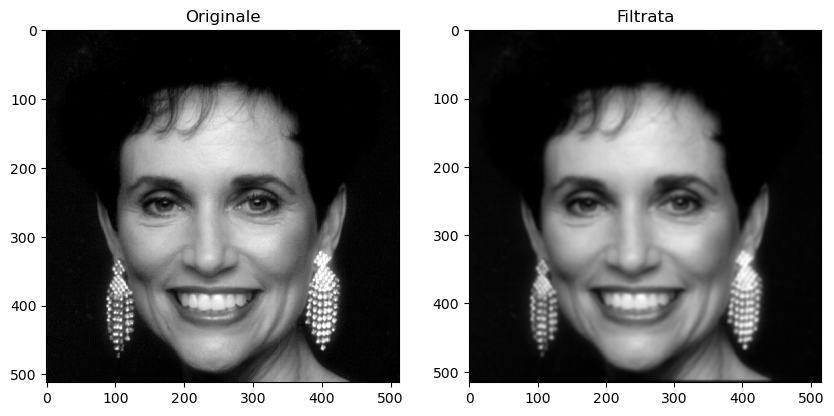

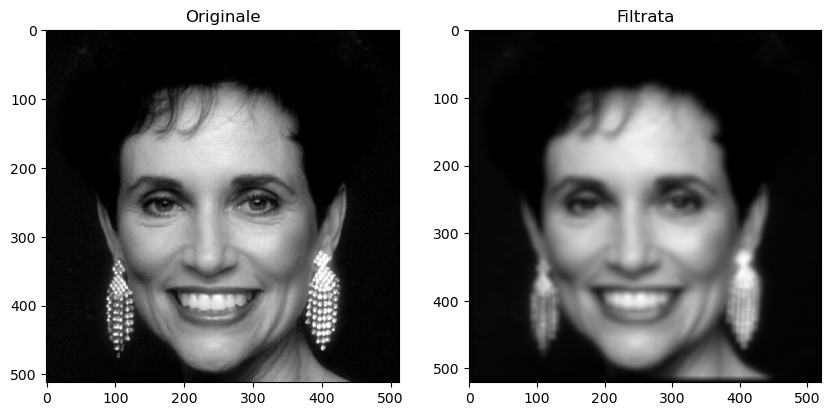

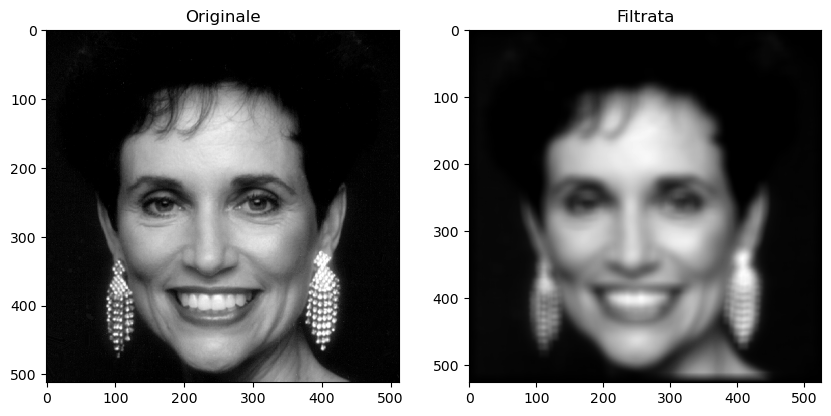

In [11]:
x = io.imread("volto.tif")
x = np.float32(x)

k_list = [5,10,15]

for i in k_list:
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x, clim=None, cmap="gray")
    plt.title("Originale")

    y = media_aritmetica_fft(x, i)

    plt.subplot(1,2,2)
    plt.imshow(y, clim=None, cmap="gray")
    plt.title("Filtrata")

### Filtraggio Notch

Lossy conversion from float64 to uint8. Range [1.4920627917711344, 17.878067315730814]. Convert image to uint8 prior to saving to suppress this warning.


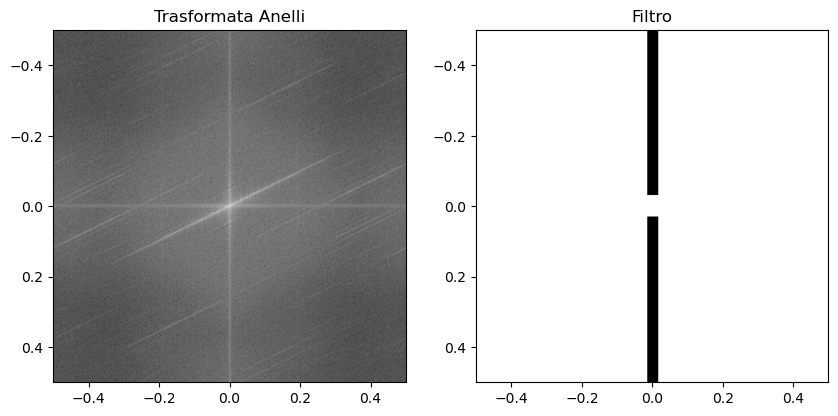

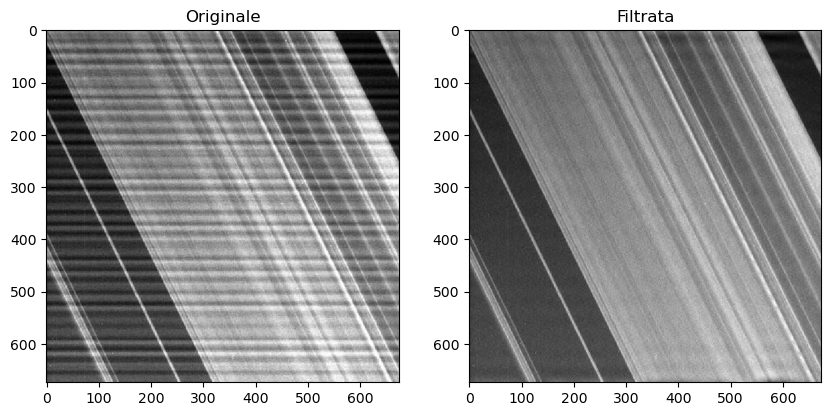

In [6]:
x = io.imread("anelli.tif")
x = np.float32(x)

# plt.figure()
# plt.imshow(x, clim=None, cmap="gray")

X = np.fft.fftshift(np.fft.fft2(x))
plt.figure()
plt.subplot(1,2,1)
plt.imshow(np.log(1+np.abs(X)), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Trasformata Anelli")


M,N = x.shape

m = np.fft.fftshift(np.fft.fftfreq(M))
n = np.fft.fftshift(np.fft.fftfreq(N))

l,k = np.meshgrid(n,m)

# Spessore linea
B=0.015

# Posizione linea
mu = 0.03

# Nel caso di configurazioni a cerchio
# raggio=0.04

D3 = (k > mu) & (np.abs(l) < B)

D2 = (k < -mu) & (np.abs(l) < B)

# Cerchi
# D2 = np.sqrt((l)**2 + (k-mu)**2) < raggio
# D3 = np.sqrt((l)**2 + (k+mu)**2) < raggio

D = (1-D3) & (1-D2)

Y = X * D

plt.subplot(1,2,2)
plt.imshow(D, clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Filtro")

y = np.real(np.fft.ifft2(np.fft.ifftshift(Y)))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(y, clim=None, cmap="gray")
plt.title("Filtrata")

io.imsave("traformata.jpg",np.log(1+np.abs(X)), )
plt.show()

### Pattern di Moirè

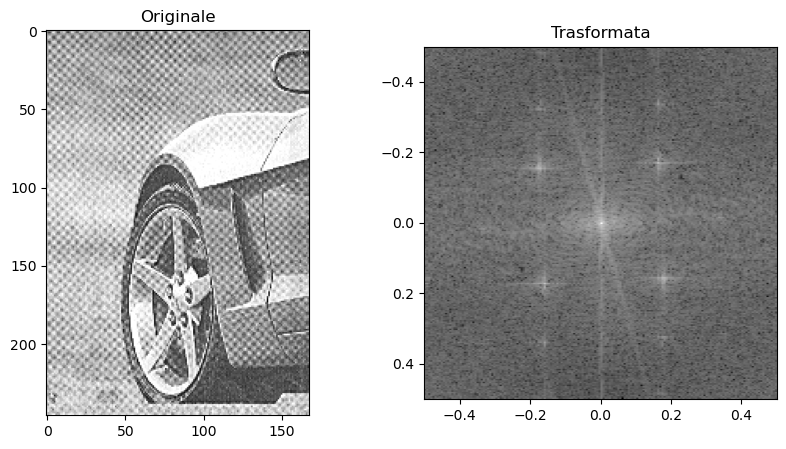

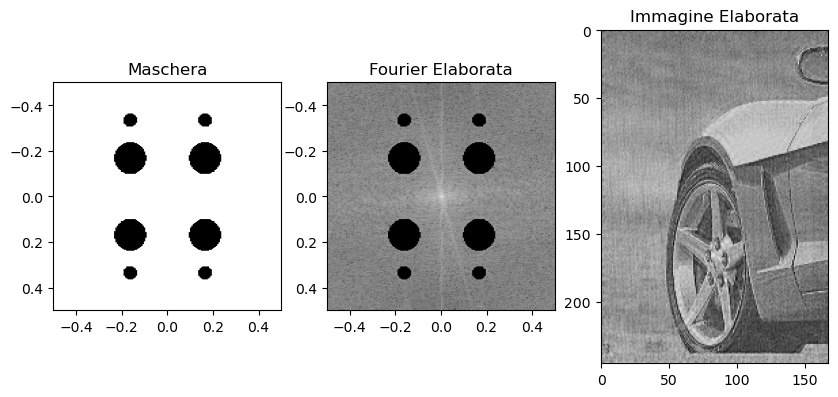

In [3]:
x = io.imread("car.tif")
x = np.float32(x)

X = np.fft.fftshift(np.fft.fft2(x))

plt.figure()
plt.subplot(1,2,1)
plt.imshow(x, clim=None, cmap="gray")
plt.title("Originale")
plt.subplot(1,2,2)
plt.imshow(np.log(np.abs(X) + 1), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Trasformata")

# Genero la maschera
M,N = x.shape

m = np.fft.fftshift(np.fft.fftfreq(M))
n = np.fft.fftshift(np.fft.fftfreq(N))

l,k = np.meshgrid(n,m)

# Parametri grande
raggio_g = 0.07
mu_g_y = 0.168
mu_g_x = 0.164

# Parametri piccolo
raggio_p = 0.03
mu_p_y = 0.335
mu_p_x = 0.164

# Cerchio grande
D_g = np.sqrt((np.abs(k)-mu_g_y)**2 + (np.abs(l) - mu_g_x)**2) > raggio_g
D_p = np.sqrt((np.abs(k)-mu_p_y)**2 + (np.abs(l) - mu_p_x)**2) > raggio_p

# Passa basso
raggio_pb = 0.4
D_pb = np.sqrt(l**2 + k**2) < raggio_pb

D = D_g & D_p

Y = D * X

# Cerchio piccolo
plt.figure()
plt.subplot(1,3,1)
plt.imshow(D, clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Maschera")

plt.subplot(1,3,2)
plt.imshow(np.log(np.abs(Y)+1), clim=None, cmap="gray", extent=(-0.5,0.5,0.5,-0.5))
plt.title("Fourier Elaborata")

plt.subplot(1,3,3)
plt.imshow(np.real(np.fft.ifft2(np.fft.ifftshift(Y))), clim=None, cmap="gray")
plt.title("Immagine Elaborata")


plt.show()

### Immagini ridimensionate

In [36]:
def detect(x):
    M,N = x.shape
    h = np.array([[0,-1,0],[0,2,0],[0,-1,0]])
    
    
    d2_orz = ndi.correlate(x, h)
    vn_orz = np.sum(np.abs(d2_orz), axis=0)
    dn_orz = vn_orz[1:] - vn_orz[:-1]
    D_orz = np.abs(np.fft.fftshift(np.fft.fft(dn_orz, N-2)))
    f_orz = np.fft.fftshift(np.fft.fftfreq(N-2))
    n_orz = f_orz[(D_orz==np.max(D_orz))&(f_orz>0)] # Identifichiamo il valore massimo nel range
    R_orz = 1/n_orz

    d2_vert = ndi.correlate(x, h.T)
    vn_vert = np.sum(np.abs(d2_vert),axis=1)
    dn_vert = vn_vert[1:] - vn_vert[:-1]
    D_vert = np.abs(np.fft.fftshift(np.fft.fft(dn_vert, M-2)))
    f_vert = np.fft.fftshift(np.fft.fftfreq(M-2))
    n_vert = f_vert[(D_vert == np.max(D_vert))&(f_vert > 0)]
    R_vert = 1/n_vert

    return D_orz,D_vert,R_orz,R_vert

[3.]
[]


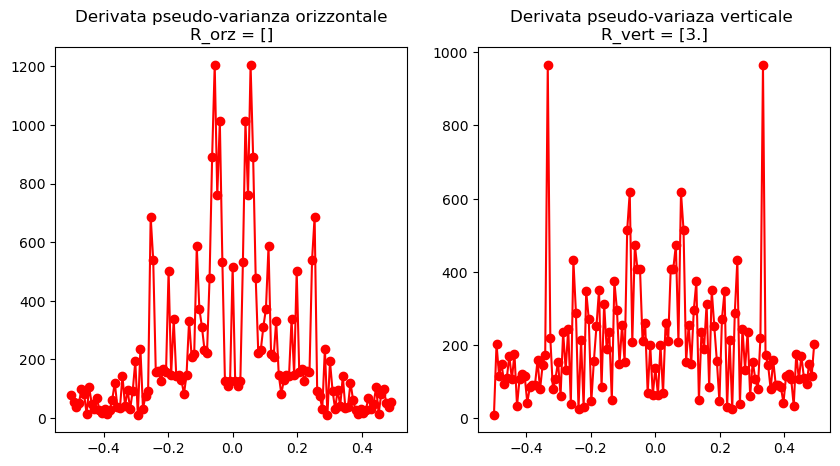

In [38]:
x = np.fromfile("zoom.y", np.float32)
x = np.reshape(x, (128,128))

d_orz,d_vert,R_orz,R_vert = detect(x)

f_orz = np.fft.fftshift(np.fft.fftfreq(len(d_orz)))
f_vert = np.fft.fftshift(np.fft.fftfreq(len(d_vert)))

plt.figure()
plt.subplot(1,2,1)
plt.plot(f_orz, d_orz, "-or")
plt.title(f"Derivata pseudo-varianza orizzontale\nR_orz = {R_orz}")
plt.subplot(1,2,2)
plt.plot(f_vert, d_vert, "-or")
plt.title(f"Derivata pseudo-variaza verticale \nR_vert = {R_vert}")

print(R_vert)
print(R_orz)

### Immagini sintetiche

In [61]:
def det_synth(x, tao):
    x = np.mean(x,2)
    H = np.log(np.abs(np.fft.fft2(x)))
    M,N = H.shape
    m = np.fft.fftfreq(M)
    n = np.fft.fftfreq(N)
    l,k = np.meshgrid(n, m)
    mask = (np.abs(l)<=tao) & (np.abs(k)<=tao)
    d = np.sum(H[mask])/ np.sum(H)
    return d

In [64]:
tao = 0.35
th = 0.7

list_files = ['volto1.png','volto2.png','volto3.png','volto4.png']
for filename in list_files:
    x = np.float64(io.imread(filename))/255 # Normalizzo
    d = det_synth(x, tao)
    if d<th:
        print(f"immagine {filename} è sintetica con d={d:.3f}")
    else:
        print(f"immagine {filename} è reale con d={d:.3f}")
    
plt.show()

immagine volto1.png è reale con d=0.713
immagine volto2.png è sintetica con d=0.681
immagine volto3.png è reale con d=0.813
immagine volto4.png è reale con d=0.782


### Immagini Contraffatte

TypeError: Image data of dtype complex128 cannot be converted to float

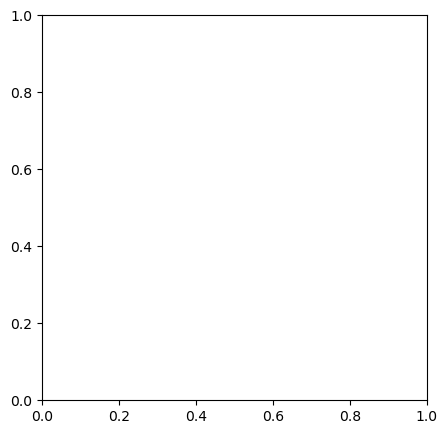

In [ ]:
x = io.imread("mare.jpg")
x = np.mean(x,2)/255

X = np.fft.fftshift(np.fft.fft2(x))

R_x = np.fft.ifftshift(np.fft.ifft2(np.abs(X)**2))

M,N = X.shape

m = np.fft.fftshift(np.fft.fftfreq(M))
n = np.fft.fftshift(np.fft.fftfreq(N))

l,k = np.meshgrid(n,m)

plt.figure()
plt.imshow(np.log(1+np.abs(R_x)), clim=None, cmap="gray")
